In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001071264"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001071264
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,JACKSONVILLE BANCORP INC /FL/
Ticker,JAXB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,18.0,1.229000e+01,4.239560e+00,3.22,9.332500e+00,14.64,1.534750e+01,15.62
interest income,33.0,6.122909e+06,7.934394e+05,5074000.00,5.605000e+06,6081000.00,6.612000e+06,8105000.00
net income,33.0,-2.160727e+06,6.622082e+06,-26843000.00,-8.400000e+05,199000.00,5.880000e+05,3109000.00
net interest income,33.0,4.322818e+06,9.772722e+05,2803000.00,3.575000e+06,4441000.00,5.098000e+06,6285000.00
provision for loan losses,33.0,2.292939e+06,4.483911e+06,-2011000.00,2.010000e+05,799000.00,1.755000e+06,20348000.00


# Plots

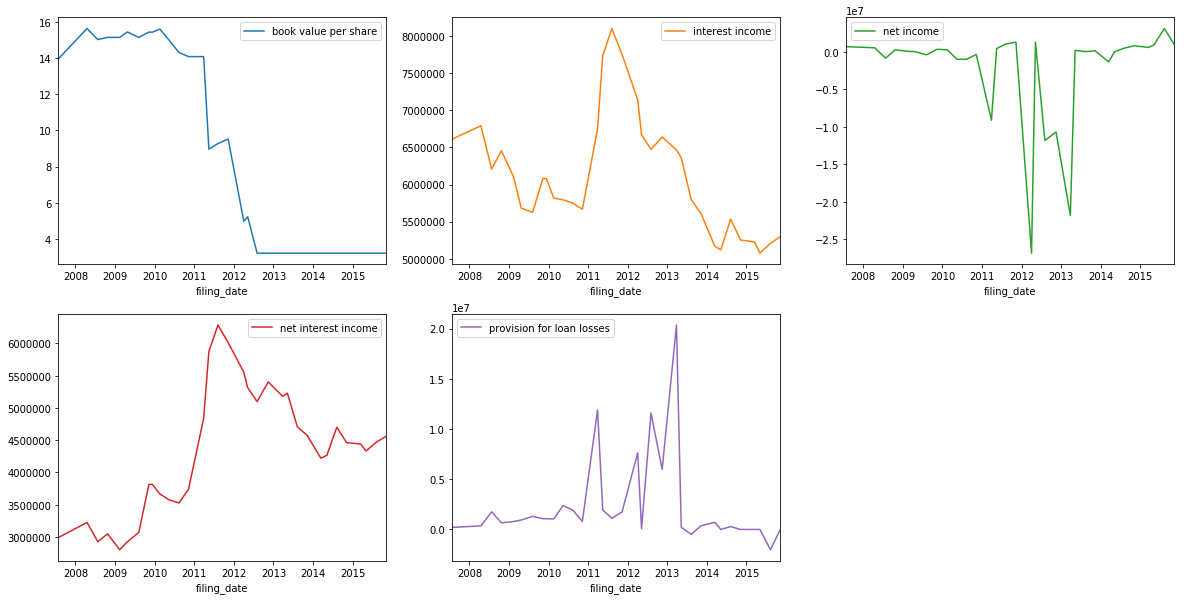

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001071264 book value per share        2007Q3 to 2007Q4: 2 periods  missing   
           book value per share                             2008Q4  missing   
           book value per share                             2010Q4  missing   
           book value per share       2012Q3 to 2015Q3: 13 periods  missing   
           interest income             2007Q3 to 2007Q4: 2 periods  missing   
           net income                  2007Q3 to 2007Q4: 2 periods  missing   
           net interest income         2007Q3 to 2007Q4: 2 periods  missing   
           provision for loan losses   2007Q3 to 2007Q4: 2 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001071264 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()